# cleaning data aka preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
filepath='laptop_data.csv'
if not os.path.exists(filepath):
    print('File not found')
else:
    df = pd.read_csv(filepath, index_col=0)
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   528 non-null    object
 1   price   528 non-null    object
 2   link    528 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB
None


In [8]:
#df[df['title'].duplicated()]  # list all the duplicated titles
#df['title'].duplicated()   #boolean filter
#it checks the duplicated items in title
df['title'].duplicated().sum()

158

### we have to clean the price and make it a number

- `f(x)=x*2`

    - `f(5)`,
    - `f(230)`,
    - `f(0.5)`
- 
- `lambda expressions`
    - `f = lambda x: x*2`
    - `f(5)`
    - `f(230)`

In [1]:
f = lambda i : i*4
print(f(4))
g= lambda x,y : x + y ** 2
print(g(2,3))

16
11


In [11]:
#this is stupid, don't use this, use the apply(), and applymap() method
#for row in df.iterrows():
#    print(row)

#apply() apllies on series
#applymap() apllies on the data frame

In [ ]:
# int('₹3,90,990'[1:].replace(',', ''))

In [19]:
#df['price'].apply(lambda val: int(val[1:].replace(',','')))
df['price_clean']=df['price'].apply(lambda val: int(val[1:].replace(',','')))

In [15]:
#slicing of the rs sign at 0 index
'₹3,90,990'[1:]
# removing comma
'₹3,90,990'[1:].replace(',','')

'390990'

In [23]:
df

,title,price,link,price_clean
510,ASUS ROG Zephyrus Duo 16 Ryzen 9 Octa Core 690...,"₹3,91,990",/asus-rog-zephyrus-duo-16-ryzen-9-octa-core-69...,391990
0,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990
275,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990
27,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990
363,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990
...,...,...,...,...
317,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹22,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,22990
188,ASUS (2022) Celeron Dual Core - (4 GB/128 GB S...,"₹22,990",/asus-2022-celeron-dual-core-4-gb-128-gb-ssd-w...,22990
288,Lenovo IdeaPad 1 Celeron Dual Core - (4 GB/256...,"₹21,513",/lenovo-ideapad-1-celeron-dual-core-4-gb-256-g...,21513
485,Avita SATUS ULTIMUS S111 Celeron Dual Core - (...,"₹21,490",/avita-satus-ultimus-s111-celeron-dual-core-4-...,21490


In [26]:
df.columns

Index(['title', 'price', 'link', 'price_clean'], dtype='object')

In [45]:
df.sort_values(by='price_clean', ascending=False, inplace=True)

In [25]:
df.tail()

,title,price,link,price_clean
317,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹22,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,22990
188,ASUS (2022) Celeron Dual Core - (4 GB/128 GB S...,"₹22,990",/asus-2022-celeron-dual-core-4-gb-128-gb-ssd-w...,22990
288,Lenovo IdeaPad 1 Celeron Dual Core - (4 GB/256...,"₹21,513",/lenovo-ideapad-1-celeron-dual-core-4-gb-256-g...,21513
485,Avita SATUS ULTIMUS S111 Celeron Dual Core - (...,"₹21,490",/avita-satus-ultimus-s111-celeron-dual-core-4-...,21490
78,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹18,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,18990


In [34]:
def clean_title(title):
    return title.split('-')[0].strip(), title.split('-')[1].strip()


df[['name', 'configuration']]=df['title'].apply(clean_title).apply(pd.Series)

In [35]:
def get_brand(name):
    return name.split()[0]
df['brand']= df['name'].apply(get_brand)

In [ ]:
df

In [37]:
df['brand'].value_counts()  #tells the frequency of items

ASUS         128
MSI          127
Lenovo        72
DELL          58
HP            57
APPLE         28
acer          26
Infinix       17
LG             4
realme         4
RedmiBook      2
ALIENWARE      1
Mi             1
Nokia          1
SAMSUNG        1
Avita          1
Name: brand, dtype: int64

<AxesSubplot: title={'center': 'Brand Distribution'}>

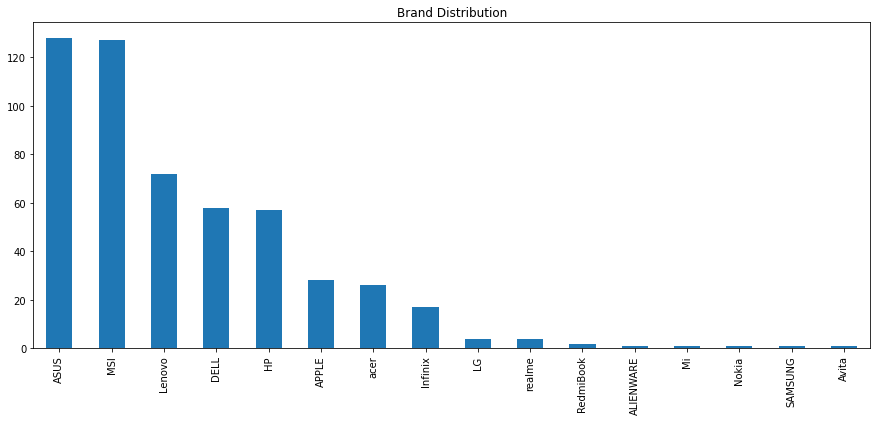

In [38]:
df['brand'].value_counts().plot(kind='bar', title='Brand Distribution', figsize=(15,6))

<AxesSubplot: title={'center': 'Price Distribution'}>

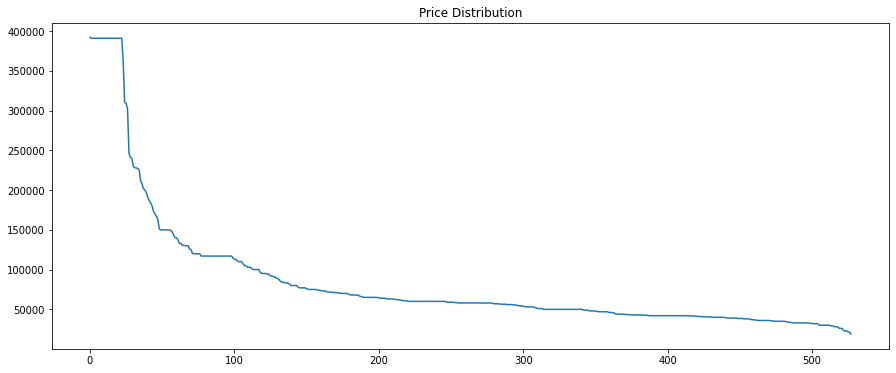

In [42]:
df['price_clean'].plot(
    kind='line',
    use_index=False,
    title='Price Distribution',
    figsize=(15,6))

<AxesSubplot: >

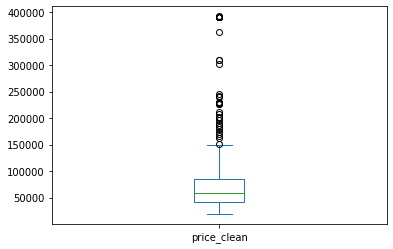

In [44]:
df['price_clean'].plot(kind='box')